In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movies_title = pd.read_csv('Movie_Id_Titles')

In [6]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df, movies_title, on='item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Exploratory Data Ananlysis

In [19]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [21]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

In [22]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'title'], dtype='object')

#### Average rating

In [27]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [28]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).tail()

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, dtype: float64

#### Number of ratings

In [29]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [30]:
df.groupby('title')['rating'].count().sort_values(ascending=False).tail()

title
Great Day in Harlem, A (1994)         1
Other Voices, Other Rooms (1997)      1
Good Morning (1971)                   1
Girls Town (1996)                     1
Á köldum klaka (Cold Fever) (1994)    1
Name: rating, dtype: int64

### Creating ratings dataframe since we are using ratings to make recommendations

In [31]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [33]:
ratings['num_of_rating'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [34]:
ratings.head()

,rating,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Visualization

In [36]:
sns.set(rc={'figure.figsize':(12,8)})

<AxesSubplot:>

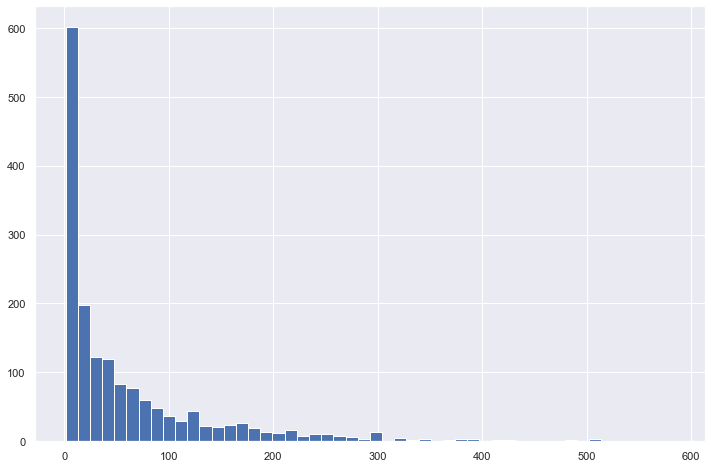

In [39]:
ratings['num_of_rating'].hist(bins=50)

<AxesSubplot:>

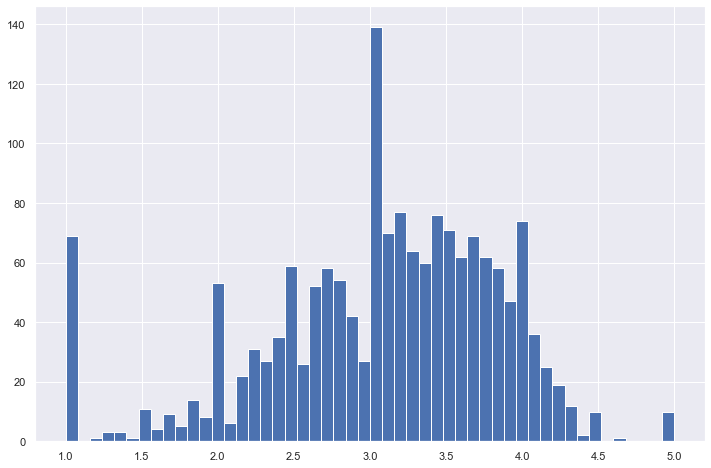

In [38]:
ratings['rating'].hist(bins=50)

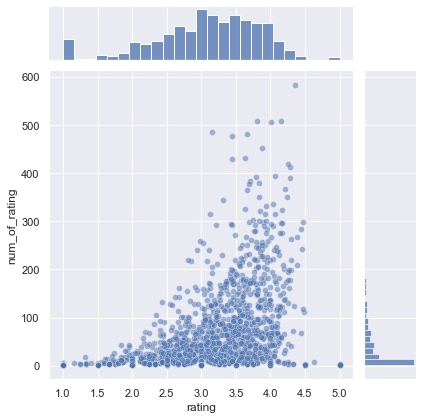

In [41]:
sns.jointplot(x='rating', y='num_of_rating', data=ratings, alpha = 0.5)

### Building recommendation system

Now we need a matrix with user_id on one y axis and name of the movies on x axis. This will surely create a lot of NaN values as there will be lot of users that have not watched many movies thus their ratings will not be present for all the movies

In [43]:
matrix = df.pivot_table(index='user_id', columns='title', values='rating')

In [44]:
matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Movies that have highest number of ratings

In [48]:
ratings.sort_values('num_of_rating', ascending=False).head(10)

,rating,num_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


These are the top 10 movies which have the highest number of ratings. Highest number of ratings mean that this movie has been watched by most number of users. 

We only have 3 movies with 4 and above rating for higher number of ratings provided. Lets use movies with rating between 3.5-4.0, we predict that these movies will have a higher correlation with other movies and will give a good recommendation. We will also select the movie with a combination of ratings like one with highest rating, one with the lowest out of these 10 and one in between. 

Let us choose 3 movies - Star wars, Contact, Liar Liar and we will grab ratings for these 3 movies from rating dataset

In [49]:
starwars_rating = matrix['Star Wars (1977)']
contact_rating = matrix['Contact (1997)']
liar_rating = matrix['Liar Liar (1997)']

Checking if we have fetched the values correctly

In [51]:
starwars_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Lets check the correlation of these 3 movies with other movies

In [53]:
similar_to_starwars = matrix.corrwith(starwars_rating)
similar_to_contact = matrix.corrwith(contact_rating)
similar_to_liarliar = matrix.corrwith(liar_rating)

/Users/akshayshirsat/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/akshayshirsat/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [55]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

All the Series have some NaN values, we will clean them by dropping all the nan values as we do not need them.

We will also make them into Dataframe instead of keeping them as Series

In [59]:
corr_with_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_with_starwars.dropna(inplace=True)
corr_with_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [60]:
corr_with_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_with_contact.dropna(inplace=True)
corr_with_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


In [61]:
corr_with_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_with_liarliar.dropna(inplace=True)
corr_with_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


Now if we rearrange these dataframes in terms of Correlation values, we can get other movies which are very highly correlated to these movies. Thats what we will use to recommend the other movies

In [63]:
corr_with_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


So for Starwars, these are the top 10 movies which have highest correlation value and can be recommended to users who have watched starwars.

Also note these are simply top 10 movies. There are more movies that can be recommended for a better user experience. However, we will see here that many movies have weird values under the correlation columns and some have very less values, this is because most of the movies might have been watched only once by the user. 

So let us drop all the movies which have number of ratings less than 100. But first lets add number of ratings tp each movie here, from the rating dataframe.

In [64]:
corr_with_starwars = corr_with_starwars.join(ratings['num_of_rating'])
corr_with_starwars.head(10)

,Correlation,num_of_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


Let us sort movies with number of ratings lesser than 200. 

In [66]:
corr_with_starwars[corr_with_starwars['num_of_rating']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


Lets do similar to other movies as well

In [69]:
corr_with_contact = corr_with_contact.join(ratings['num_of_rating'])
corr_with_contact[corr_with_contact['num_of_rating']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_rating
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
Sneakers (1992),0.377275,150
"Firm, The (1993)",0.376987,151
Arsenic and Old Lace (1944),0.373759,115
Outbreak (1995),0.358015,104


In [70]:
corr_with_liarliar = corr_with_liarliar.join(ratings['num_of_rating'])
corr_with_liarliar[corr_with_liarliar['num_of_rating']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


## Conclusion

We can see above the list of movies that can be best recommended to the user based on the movies that the user watches. 